# SuperGlue Alignment of Single Image

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import jupyter_compare_view

Jupyter compare_view v0.2.4


In [5]:
path = 'ALIGNED_DATASET/superglue/2021-11-15_23-07-28_ir_2021-11-15_23-07-28_vis_matches.npz'
npz = np.load(path)

In [6]:
print(npz.files)
print(npz['keypoints0'].shape)
print(npz['keypoints1'].shape)
print(npz['matches'].shape)
print(np.sum(npz['matches']>-1))
print(npz['match_confidence'].shape)

['keypoints0', 'keypoints1', 'matches', 'match_confidence']
(2048, 2)
(2048, 2)
(2048,)
671
(2048,)


In [7]:
best_idx = npz['match_confidence'] > 0.90
best_kpt0 = npz['keypoints0'][best_idx]
best_kpt1 = []
for i, idx in enumerate(best_idx):
    if idx:
        if npz['matches'][i] == -1:
            print("WTF HAPPENED HERE")
        best_kpt1.append(npz['keypoints1'][npz['matches'][i]])
best_kpt1 = np.array(best_kpt1)

In [8]:
npz['keypoints1'][npz['matches'][0]]

array([1422.,  234.], dtype=float32)

In [9]:
best_kpt0.shape

(501, 2)

In [10]:
best_kpt1.shape

(501, 2)

In [16]:
im_vis = cv2.imread('ALIGNED_DATASET/2021-11-15_23-07-28_vis.jpg')
im_ir = cv2.imread('ALIGNED_DATASET/2021-11-15_23-07-28_ir.jpg')

In [17]:
assert not np.array_equal(best_kpt0, best_kpt1)

In [18]:
for kp0, kp1 in zip(best_kpt0, best_kpt1):
    print("Keypoints:", kp0, kp1)

Keypoints: [1442.  697.] [1368.  702.]
Keypoints: [1092.  347.] [1010.  373.]
Keypoints: [544. 793.] [475. 833.]
Keypoints: [538. 685.] [472. 729.]
Keypoints: [1098.  367.] [1016.  393.]
Keypoints: [914. 287.] [830. 320.]
Keypoints: [1088.  906.] [1030.  925.]
Keypoints: [1518.  741.] [1440.  743.]
Keypoints: [ 519. 1115.] [ 466. 1170.]
Keypoints: [903. 314.] [822. 346.]
Keypoints: [1055.  272.] [965. 301.]
Keypoints: [1564.  598.] [1475.  601.]
Keypoints: [911. 633.] [842. 659.]
Keypoints: [892. 650.] [825. 677.]
Keypoints: [891. 314.] [811. 345.]
Keypoints: [426. 868.] [360. 921.]
Keypoints: [974. 339.] [892. 371.]
Keypoints: [1455.  695.] [1378.  701.]
Keypoints: [876. 416.] [798. 448.]
Keypoints: [1243. 1139.] [1193. 1152.]
Keypoints: [1272.  610.] [1191.  624.]
Keypoints: [773. 409.] [702. 441.]
Keypoints: [506. 781.] [440. 827.]
Keypoints: [881. 177.] [794. 210.]
Keypoints: [560. 646.] [494. 686.]
Keypoints: [1057.  418.] [972. 445.]
Keypoints: [1328.  651.] [1251.  661.]
Keypoin

In [19]:
(H, mask) = cv2.findHomography(best_kpt0, best_kpt1, method=cv2.RANSAC)
(h, w) = im_vis.shape[:2]


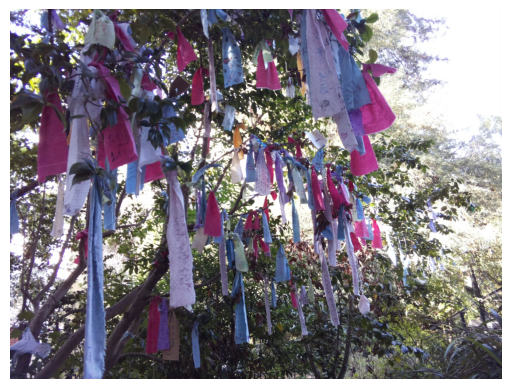
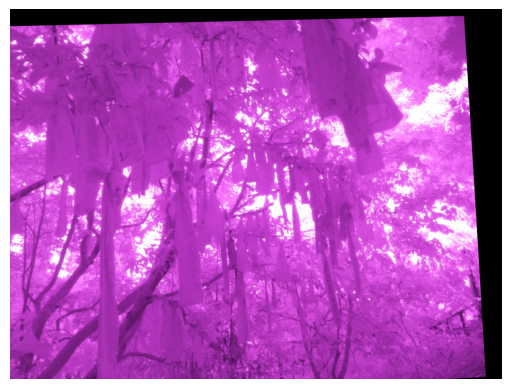

In [20]:
%%compare
fig, ax1 = plt.subplots()
ax1.axis("off")
ax1.imshow(cv2.cvtColor(im_vis, cv2.COLOR_BGR2RGB))

# Align and convert the 
fig, ax2 = plt.subplots()
ax2.axis("off")
im_aligned = cv2.warpPerspective(im_ir, H, (w, h))
ax2.imshow(cv2.cvtColor(im_aligned, cv2.COLOR_BGR2RGB))